In [9]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [10]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'Dataset/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 17572 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

In [11]:
cnn = tf.keras.models.load_model('trained_plant_disease_model.keras')

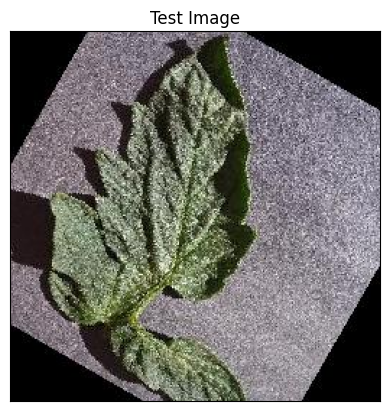

In [13]:
#Test Image Visualization
import cv2
image_path = r'Dataset/train/Tomato___healthy/0a205a11-1e64-49f7-93c2-ad59312b4f83___RS_HL 0334_new30degFlipLR.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [14]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


In [15]:
print(predictions)

[[1.9145975e-19 2.8957660e-19 9.1648584e-18 3.6594428e-13 7.1779003e-18
  2.2942191e-12 6.3693059e-22 2.5487853e-20 1.1890554e-18 1.3959267e-20
  5.9451514e-18 3.6412644e-24 8.7082707e-21 1.8256910e-24 1.4543522e-24
  4.7039839e-20 4.5626504e-20 2.8541910e-18 5.9451907e-20 1.9876642e-19
  6.9015463e-19 7.0736455e-21 2.7201346e-18 3.2077500e-22 1.2532993e-17
  2.0435732e-13 1.1566415e-20 5.7308856e-20 1.6240659e-21 8.7813930e-21
  5.6515207e-14 3.2411561e-15 6.9924793e-16 4.5524328e-18 2.6727969e-12
  5.4752490e-22 6.6020710e-21 1.0000000e+00]]


In [16]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

37


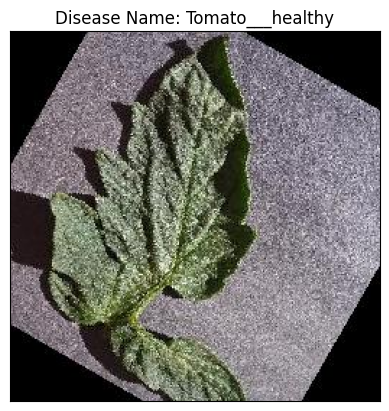

In [17]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()